In [2]:

from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf



In [3]:
def load_images_from_subdirectories(directory):
    images = []
    labels = []

    class_folders = os.listdir(directory)
    for class_folder in class_folders:
        class_folder_path = os.path.join(directory, class_folder)
        
        if os.path.isdir(class_folder_path):
           
            class_label = int(class_folder.split('_')[1])
            
            for file_name in os.listdir(class_folder_path):
                file_path = os.path.join(class_folder_path, file_name)
                if os.path.isfile(file_path) and file_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                    try:
                        img = Image.open(file_path).convert('L')  
                        img_array = np.array(img)  
                        reshaped_img=np.reshape(img_array,(-1))
                        images.append(reshaped_img)
                        labels.append(class_label)
                    except Exception as e:
                        print(f"Error loading {file_path}: {e}")
    
    return np.array(images), np.array(labels)

# Define paths to subdirectories
train_directory = "C:/Users/fatem/Downloads/archive/persian-handwritten-digits-2/Train"
test_directory = "C:/Users/fatem/Downloads/archive/persian-handwritten-digits-2/Test"

# Load images and labels
train_images, train_labels = load_images_from_subdirectories(train_directory)
test_images, test_labels = load_images_from_subdirectories(test_directory)

print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)


Train images shape: (105000, 784)
Train labels shape: (105000,)
Test images shape: (30000, 784)
Test labels shape: (30000,)


In [ ]:
train_labels

array([0, 0, 0, ..., 9, 9, 9])

(array([10505.,     0., 10504.,     0., 10415.,     0., 10510.,     0.,
        10541.,     0.,     0., 10621.,     0., 10502.,     0., 10460.,
            0., 10489.,     0., 10453.]),
 array([0.  , 0.45, 0.9 , 1.35, 1.8 , 2.25, 2.7 , 3.15, 3.6 , 4.05, 4.5 ,
        4.95, 5.4 , 5.85, 6.3 , 6.75, 7.2 , 7.65, 8.1 , 8.55, 9.  ]),
 <BarContainer object of 20 artists>)

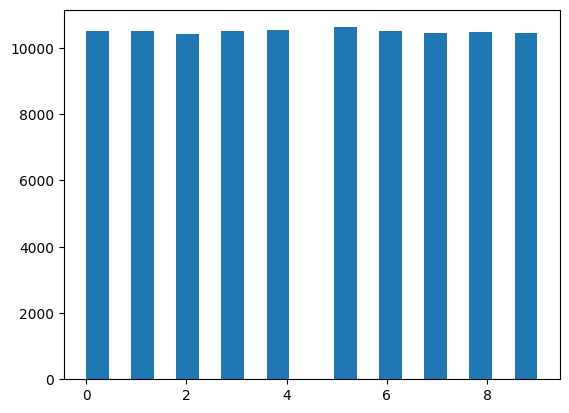

In [ ]:
plt.hist(train_labels,bins=20)

0


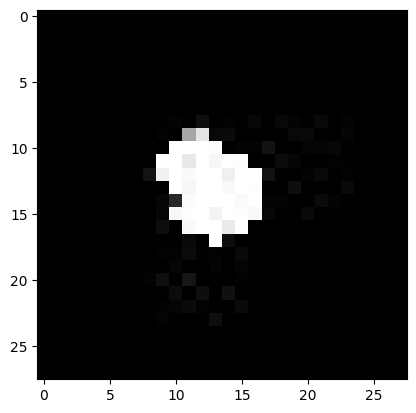

In [ ]:
idx=5500
img=np.reshape(train_images[idx],(28,-1))
print(train_labels[idx])
plt.gray()
plt.imshow(img)


In [ ]:
print("Shape of train_images:", train_images.shape)
print("Shape of test_images:", test_images.shape)


Shape of train_images: (105000, 784)
Shape of test_images: (30000, 784)


# Algorithms

## Normalise

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scalar=MinMaxScaler(feature_range=(0,1))
x_train=scalar.fit_transform(train_images)
x_test=scalar.transform(test_images)

In [ ]:
x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01176471, 0.00392157,
       0.        , 0.0627451 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01960784, 0.        ,
       0.03137255, 0.00784314, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.03529412, 0.        , 0.        ,
       0.01960784, 0.03921569, 0.        , 0.        , 0.        ,
       0.05098039, 0.        , 0.        , 0.        , 0.02745098,
       0.05098039, 0.03529412, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.03137255,
       0.        , 0.        , 0.00784314, 0.        , 0.        ,
       0.00392157, 0.05882353, 0.        , 0.02745098, 0.     

In [ ]:
x_train.shape, x_test.shape

((105000, 784), (30000, 784))

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
def calculate(y_train,y_test,y_pred_train,y_pred_test):
    acc_train=accuracy_score(y_true=y_train,y_pred=y_pred_train)
    acc_test=accuracy_score(y_true=y_test,y_pred=y_pred_test)
    
    p=precision_score(y_true=y_test,y_pred=y_pred_test,average="weighted")
    r=recall_score(y_true=y_test,y_pred=y_pred_test,average="weighted")

    print(f"acc train: {acc_train} - acc test: {acc_test} - precision: {p} - recall: {r}")
    return acc_train,acc_test,p,r 

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=256,max_depth=128,min_samples_split=8)
rf.fit(x_train,train_labels)

RandomForestClassifier(max_depth=128, min_samples_split=8, n_estimators=256)

In [ ]:
y_pred_train=rf.predict(x_train)
y_pred_test=rf.predict(x_test)

acc_train_rf,acc_test_rf,p_rf,r_rf=calculate(train_labels,test_labels,y_pred_train,y_pred_test)

acc train: 0.9998476190476191 - acc test: 0.9953 - precision: 0.9953040307104779 - recall: 0.9953


## SVM

In [ ]:
from sklearn.svm import SVC
svm=SVC(kernel="poly")
svm.fit(x_train,train_labels)

SVC(kernel='poly')

In [ ]:
y_pred_train=svm.predict(x_train)
y_pred_test=svm.predict(x_test)
acc_train_svm,acc_test_svm,p_svm,r_svm=calculate(train_labels,test_labels,y_pred_train,y_pred_test)

acc train: 0.9990190476190476 - acc test: 0.9970666666666667 - precision: 0.9970707634992301 - recall: 0.9970666666666667


## ANN


In [ ]:
from sklearn.neural_network import MLPClassifier
ann=MLPClassifier(hidden_layer_sizes=200)
ann.fit(x_train,train_labels)

MLPClassifier(hidden_layer_sizes=200)

In [ ]:
y_pred_train=ann.predict(x_train)
y_pred_test=ann.predict(x_test)
acc_train_ann,acc_test_ann,p_ann,r_ann=calculate(train_labels,test_labels,y_pred_train,y_pred_test)

acc train: 1.0 - acc test: 0.9985333333333334 - precision: 0.9985338150986631 - recall: 0.9985333333333334


# Comparison

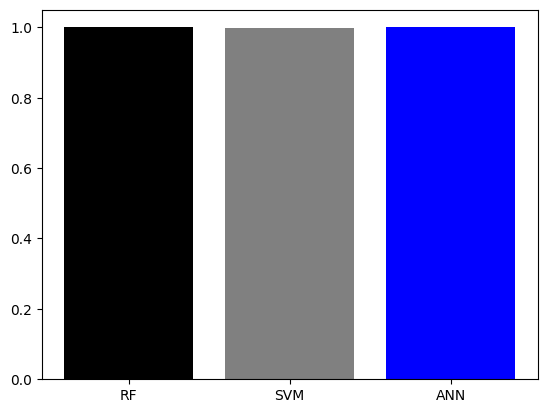

In [ ]:
import matplotlib.pyplot as plt
acc_train=[acc_train_rf,acc_train_svm,acc_train_ann]
title=["RF","SVM","ANN"]
colors=["black","gray","blue"]
plt.bar(title,acc_train,color=colors)
plt.show()

# Neural Network

In [ ]:
def load_images_from_subdirectories(directory):
    images = []
    labels = []

    class_folders = os.listdir(directory)
    for class_folder in class_folders:
        class_folder_path = os.path.join(directory, class_folder)
        
        if os.path.isdir(class_folder_path):
           
            class_label = int(class_folder.split('_')[1])
            
            for file_name in os.listdir(class_folder_path):
                file_path = os.path.join(class_folder_path, file_name)
                if os.path.isfile(file_path) and file_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                    try:
                        img = Image.open(file_path).convert('L')  
                        img_array = np.array(img)  
                        images.append(img_array)
                        labels.append(class_label)
                    except Exception as e:
                        print(f"Error loading {file_path}: {e}")
    
    return np.array(images), np.array(labels)

# Define paths to subdirectories
train_directory = "C:/Users/fatem/Downloads/archive/persian-handwritten-digits-2/Train"
test_directory = "C:/Users/fatem/Downloads/archive/persian-handwritten-digits-2/Test"

# Load images and labels
train_images, train_labels = load_images_from_subdirectories(train_directory)
test_images, test_labels = load_images_from_subdirectories(test_directory)

print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

Train images shape: (105000, 28, 28)
Train labels shape: (105000,)
Test images shape: (30000, 28, 28)
Test labels shape: (30000,)


In [ ]:
np.min(img),np.max(img)

(0, 255)

In [ ]:
train_images= train_images/255.0
test_images= test_images/255.0

## Model defenition

In [ ]:
model=keras.Sequential()
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=256,activation="relu"))
model.add(keras.layers.Dense(units=128,activation="relu"))
model.add(keras.layers.Dense(units=10,activation="softmax"))

In [ ]:
model.compile(optimizer="adam",loss=tf.losses.sparse_categorical_crossentropy,metrics=['accuracy'])

In [ ]:
model.build(input_shape=(None,28,28))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
hist = model.fit(train_images, train_labels, epochs=10, batch_size=250, validation_data=(test_images,test_labels))

Epoch 1/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9403 - loss: 0.2227 - val_accuracy: 0.9945 - val_loss: 0.0182
Epoch 2/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9965 - loss: 0.0120 - val_accuracy: 0.9963 - val_loss: 0.0124
Epoch 3/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9977 - loss: 0.0076 - val_accuracy: 0.9971 - val_loss: 0.0107
Epoch 4/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9989 - loss: 0.0038 - val_accuracy: 0.9967 - val_loss: 0.0091
Epoch 5/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9986 - loss: 0.0040 - val_accuracy: 0.9973 - val_loss: 0.0084
Epoch 6/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9991 - loss: 0.0029 - val_accuracy: 0.9970 - val_loss: 0.0104
Epoch 7/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9988 - loss: 0.0035 - val_accuracy: 0.9976 - val_loss: 0.0088
Epoch 8/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9994 - loss: 0.0021 - val_accuracy: 0.

In [ ]:
idx=9
img=test_images[idx]
print(test_labels[idx])

0


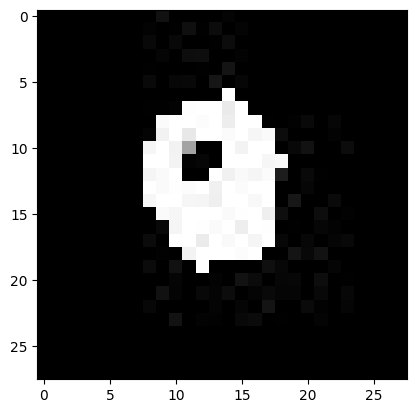

In [ ]:
plt.gray()
plt.imshow(img)

In [ ]:
test_data=np.reshape(img,(-1,784))
test_data.shape

(1, 784)

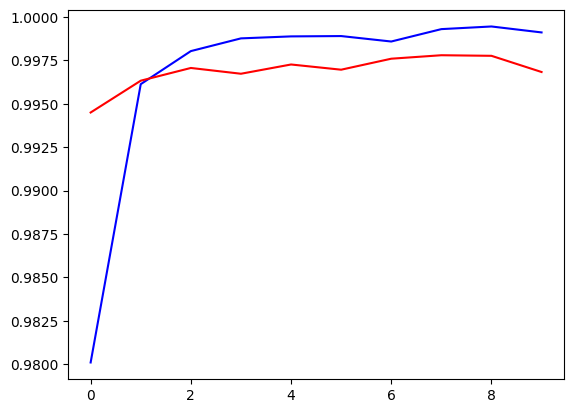

In [ ]:
acc= hist.history['accuracy']
val_acc= hist.history["val_accuracy"]

plt.plot(acc,color='blue')
plt.plot(val_acc,color='red')

## CNN

In [ ]:
x_train.shape

(105000, 784)

In [ ]:
np.min(train_images),np.max(train_images)

(0.0, 1.0)

## preprocessing

In [ ]:
x_train=x_train.reshape(-1,28,28,1).astype("float32") / 255
x_test=x_test.reshape(-1,28,28,1).astype("float32") / 255

In [ ]:
x_train.shape

(105000, 28, 28, 1)

## model definition

In [ ]:
import keras
model=keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=(2,2),strides=(1,1),padding="valid",activation="relu", input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2),strides=(1,1),padding="valid",))
model.add(keras.layers.AveragePooling2D(pool_size=(2,2),strides=(2,2),padding="valid"))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=256,activation="relu"))
model.add(keras.layers.Dense(units=128,activation="relu"))
model.add(keras.layers.Dense(units=10,activation="softmax"))

c:\Users\fatem\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer="adam",loss=tf.losses.sparse_categorical_crossentropy,metrics=['accuracy'])

In [ ]:

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 27, 27, 32)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 13, 13, 32)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │     1,384,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,419,050 (5.41 MB)

 Trainable params: 1,419,050 (5.41 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
hist = model.fit(train_images, train_labels, epochs=10, batch_size=250, validation_data=(test_images,test_labels))

Epoch 1/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9514 - loss: 0.1948 - val_accuracy: 0.9962 - val_loss: 0.0129
Epoch 2/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9970 - loss: 0.0093 - val_accuracy: 0.9977 - val_loss: 0.0083
Epoch 3/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9981 - loss: 0.0059 - val_accuracy: 0.9981 - val_loss: 0.0053
Epoch 4/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9990 - loss: 0.0030 - val_accuracy: 0.9978 - val_loss: 0.0066
Epoch 5/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9991 - loss: 0.0029 - val_accuracy: 0.9985 - val_loss: 0.0047
Epoch 6/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9996 - loss: 0.0014 - val_accuracy: 0.9965 - val_loss: 0.0116
Epoch 7/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.9995 - loss: 0.0019 - val_accuracy: 0.9987 - val_loss: 0.0042
Epoch 8/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9997 - loss: 6.9971e-04 - val

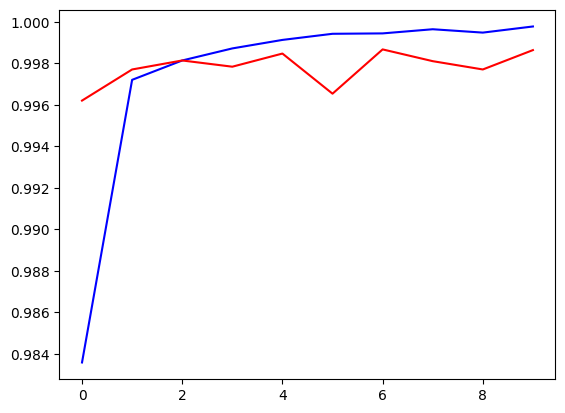

In [ ]:
acc= hist.history['accuracy']
val_acc= hist.history["val_accuracy"]

plt.plot(acc,color='blue')
plt.plot(val_acc,color='red')

## Dropout

In [ ]:
x_train.shape

(105000, 28, 28, 1)

In [ ]:
model=keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=(2,2),strides=(1,1),padding="valid",activation="relu", input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(32,(3,3),activation="relu"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=256,activation="relu"))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(units=128,activation="relu"))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(units=10,activation="softmax"))


In [ ]:
model.compile(optimizer="adam",loss=tf.losses.sparse_categorical_crossentropy,metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 27, 27, 32)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 11, 11, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       205,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 248,650 (971.29 KB)

 Trainable params: 248,650 (971.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
hist=model.fit(train_images,train_labels,epochs=10,batch_size=256,validation_data=(test_images,test_labels))

Epoch 1/10
411/411 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.8381 - loss: 0.4848 - val_accuracy: 0.9921 - val_loss: 0.0236
Epoch 2/10
411/411 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9906 - loss: 0.0308 - val_accuracy: 0.9961 - val_loss: 0.0116
Epoch 3/10
411/411 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9936 - loss: 0.0209 - val_accuracy: 0.9968 - val_loss: 0.0095
Epoch 4/10
411/411 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9950 - loss: 0.0162 - val_accuracy: 0.9971 - val_loss: 0.0091
Epoch 5/10
411/411 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9959 - loss: 0.0131 - val_accuracy: 0.9972 - val_loss: 0.0086
Epoch 6/10
411/411 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9966 - loss: 0.0112 - val_accuracy: 0.9978 - val_loss: 0.0077
Epoch 7/10
411/411 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9972 - loss: 0.0103 - val_accuracy: 0.9968 - val_loss: 0.0092
Epoch 8/10
411/411 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9974 - loss: 0.0081 - val_accu

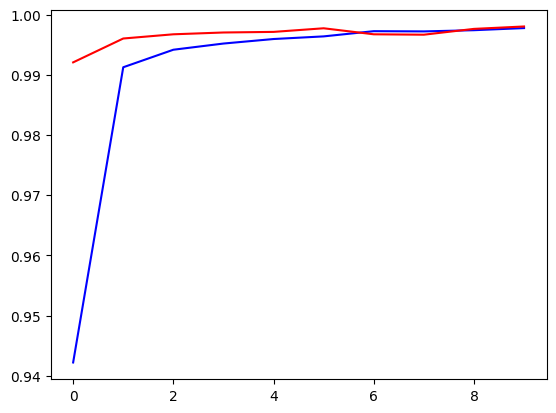

In [ ]:
acc= hist.history['accuracy']
val_acc= hist.history["val_accuracy"]

plt.plot(acc,color='blue')
plt.plot(val_acc,color='red')